In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [4]:
df = pd.read_csv('C:/Mall_Customers.csv')

In [5]:
display(df.head(200))

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [7]:
display(df.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

Text(0.5, 1.0, 'Distribución de Edad')

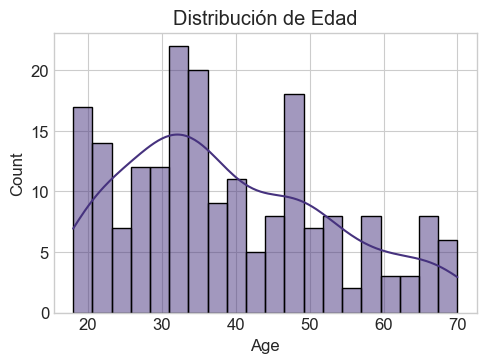

In [10]:
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribución de Edad')

Text(0.5, 1.0, 'Distribución de Ingreso Anual')

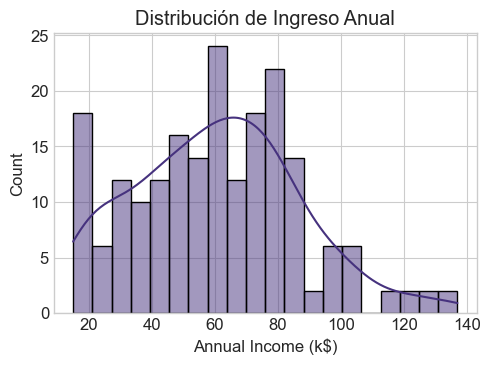

In [16]:
plt.subplot(2, 2, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribución de Ingreso Anual')

Text(0.5, 1.0, 'Distribución de Puntaje de Gasto')

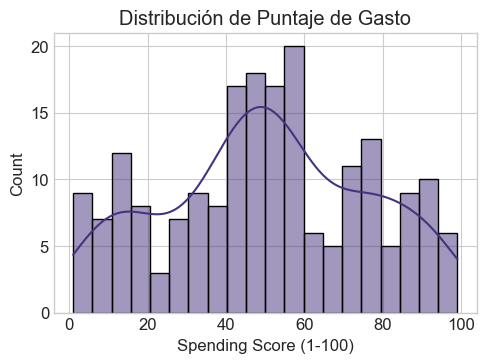

In [20]:
plt.subplot(2, 2, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Distribución de Puntaje de Gasto')

Text(0.5, 1.0, 'Distribución de Género')

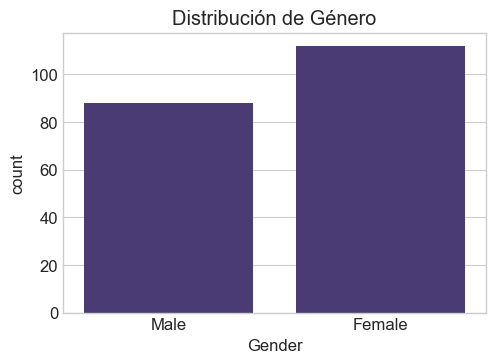

In [22]:
plt.subplot(2, 2, 4)
sns.countplot(x='Gender', data=df)
plt.title('Distribución de Género')

In [23]:
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

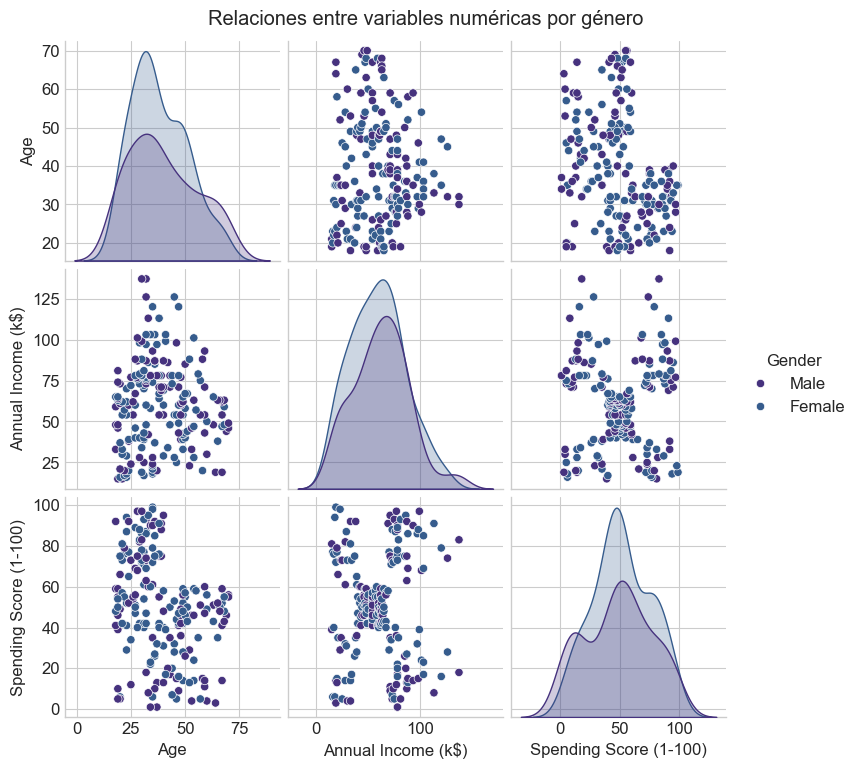

In [25]:
sns.pairplot(df, hue='Gender', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.suptitle('Relaciones entre variables numéricas por género', y=1.02)
plt.show()

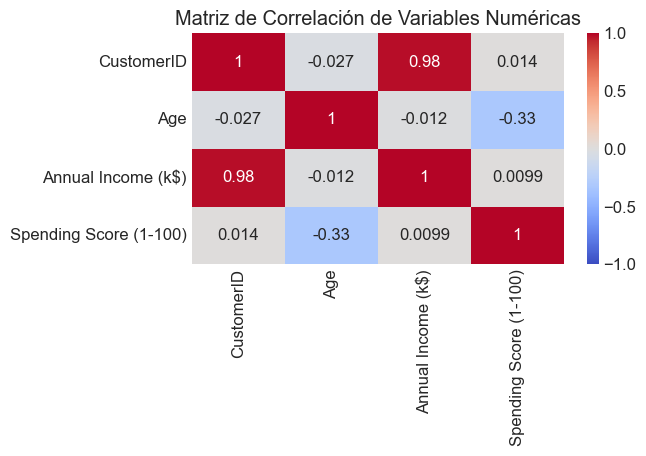

In [84]:
plt.figure(figsize=(6, 3))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [94]:
df_processed = df.copy()
df_processed['Gender'] = df_processed['Gender'].map({'Male': 0, 'Female': 1})


Text(0.5, 1.0, 'Boxplot de Edad')

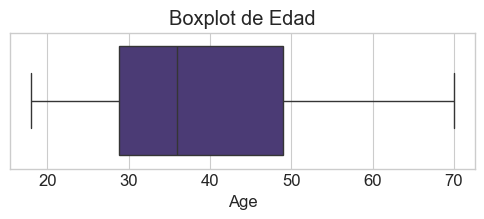

In [96]:
plt.figure(figsize=(6, 6))
plt.subplot(3, 1, 1)
sns.boxplot(x='Age', data=df_processed)
plt.title('Boxplot de Edad')

Text(0.5, 1.0, 'Boxplot de Ingreso Anual')

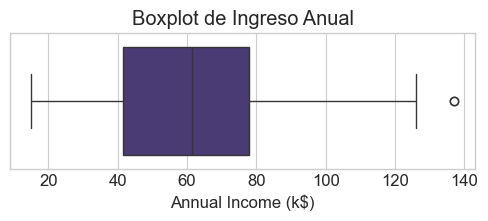

In [98]:
plt.figure(figsize=(6, 6))
plt.subplot(3, 1, 2)
sns.boxplot(x='Annual Income (k$)', data=df_processed)
plt.title('Boxplot de Ingreso Anual')

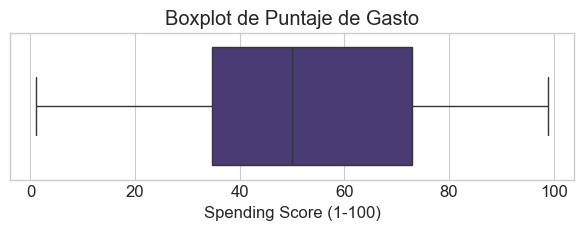

In [106]:
plt.figure(figsize=(6, 6))
plt.subplot(3, 1, 3)
sns.boxplot(x='Spending Score (1-100)', data=df_processed)
plt.title('Boxplot de Puntaje de Gasto')
plt.tight_layout()
plt.show()

In [108]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_processed[features]), columns=features)
print("Datos escalados (primeras 5 filas):")
display(df_scaled.head())

Datos escalados (primeras 5 filas):


,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,-1.128152
1,-1.281035,-1.738999,1.195704,-1.128152
2,-1.352802,-1.700830,-1.715913,0.886405
3,-1.137502,-1.700830,1.040418,0.886405
4,-0.563369,-1.662660,-0.395980,0.886405


In [110]:
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

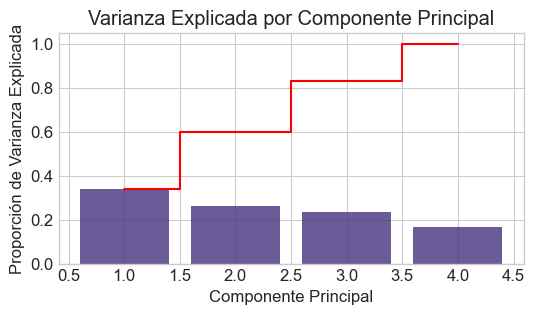

In [116]:
plt.figure(figsize=(6, 3))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.8)
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', color='red')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

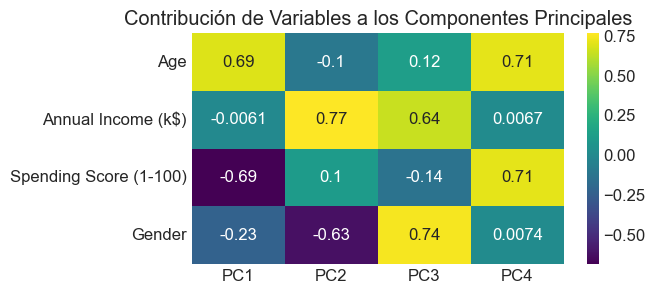

In [114]:
plt.figure(figsize=(6, 3))
sns.heatmap(pca.components_.T, annot=True, cmap='viridis', 
            yticklabels=features, xticklabels=[f'PC{i+1}' for i in range(pca.components_.shape[0])])
plt.title('Contribución de Variables a los Componentes Principales')
plt.show()

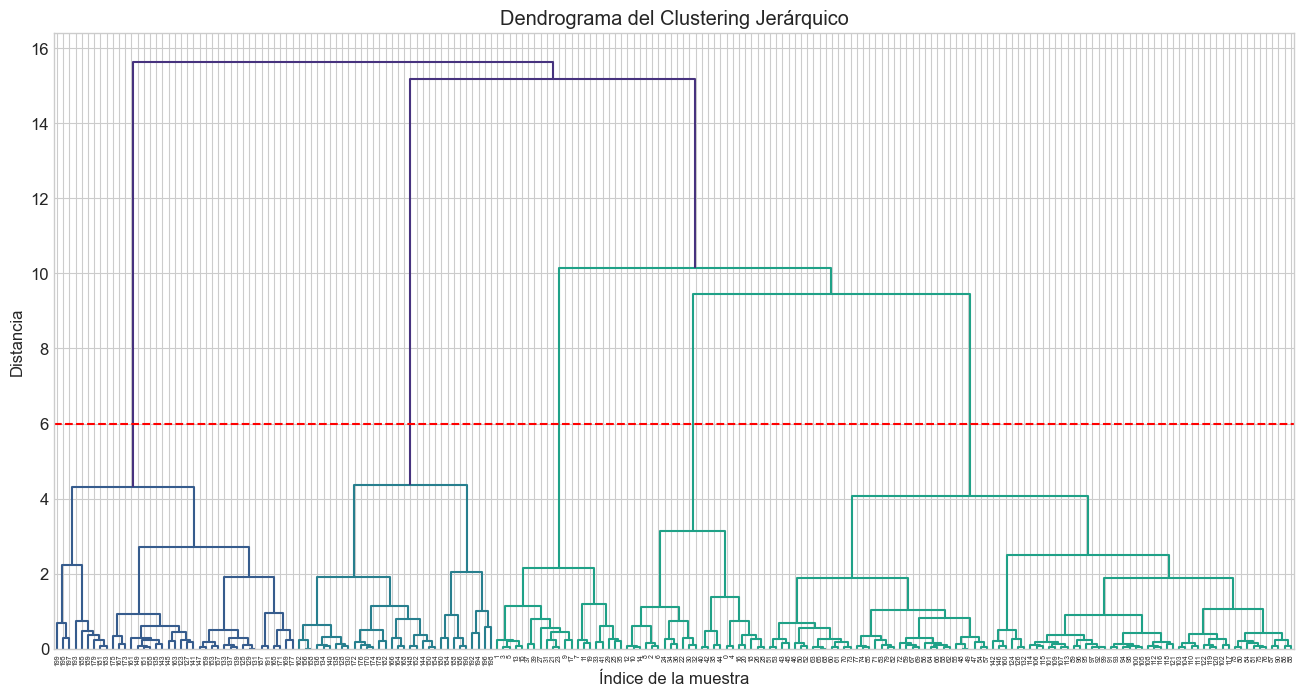

In [120]:
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X_selected = df_scaled[selected_features]
plt.figure(figsize=(16, 8))
dendrogram_plot = dendrogram(linkage(X_selected, method='ward'))
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
plt.axhline(y=6, color='r', linestyle='--')  
plt.show()

In [126]:
n_clusters_range = range(2, 11)
silhouette_scores = []
calinski_scores = []
for n_clusters in n_clusters_range:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(X_selected)
    
    silhouette_scores.append(silhouette_score(X_selected, labels))
    calinski_scores.append(calinski_harabasz_score(X_selected, labels))


Text(0.5, 1.0, 'Método del Codo: Coeficiente de Silhouette')

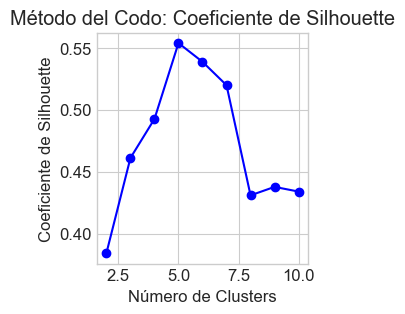

In [128]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Método del Codo: Coeficiente de Silhouette')

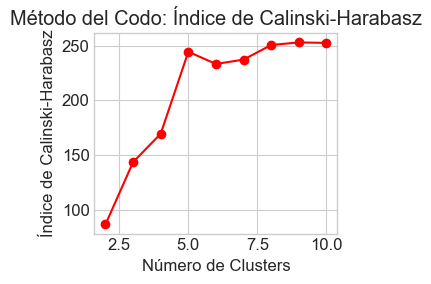

In [132]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, calinski_scores, 'ro-')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Calinski-Harabasz')
plt.title('Método del Codo: Índice de Calinski-Harabasz')
plt.tight_layout()
plt.show()

In [134]:
optimal_clusters = 5
model_final = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
df_processed['Cluster'] = model_final.fit_predict(X_selected)
print(f"Número óptimo de clusters: {optimal_clusters}")
print(f"Coeficiente de Silhouette: {silhouette_score(X_selected, df_processed['Cluster']):.4f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_score(X_selected, df_processed['Cluster']):.4f}")


Número óptimo de clusters: 5
Coeficiente de Silhouette: 0.5538
Índice de Calinski-Harabasz: 244.4103


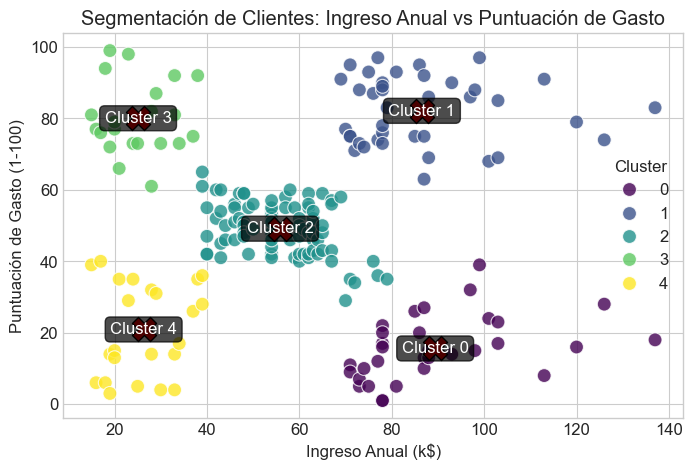

In [138]:
plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    s=100,
    data=df_processed,
    alpha=0.8
)
plt.title('Segmentación de Clientes: Ingreso Anual vs Puntuación de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend(title='Cluster')
for cluster in range(optimal_clusters):
    centroid = df_processed[df_processed['Cluster'] == cluster][['Annual Income (k$)', 'Spending Score (1-100)']].mean()
    plt.scatter(centroid[0], centroid[1], s=300, c='red', marker='X', edgecolor='black', label='_nolegend_')
    plt.annotate(f'Cluster {cluster}', (centroid[0], centroid[1]), 
                 fontsize=12, ha='center', va='center', color='white',
                 bbox=dict(boxstyle="round,pad=0.3", fc='black', alpha=0.7))

plt.show()

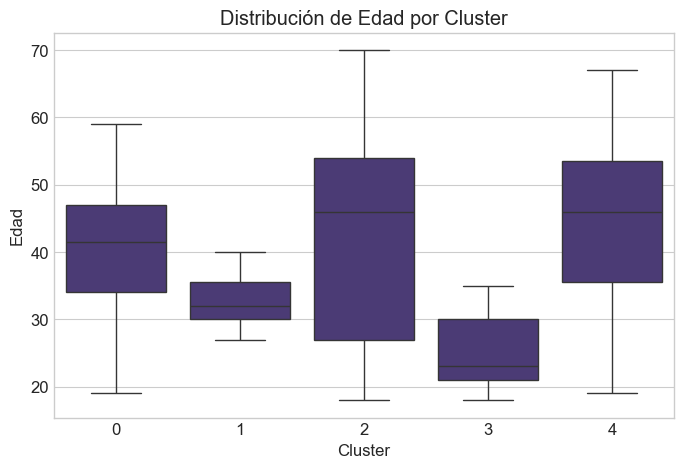

In [140]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Age', data=df_processed)
plt.title('Distribución de Edad por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Edad')
plt.show()

<Figure size 800x600 with 0 Axes>

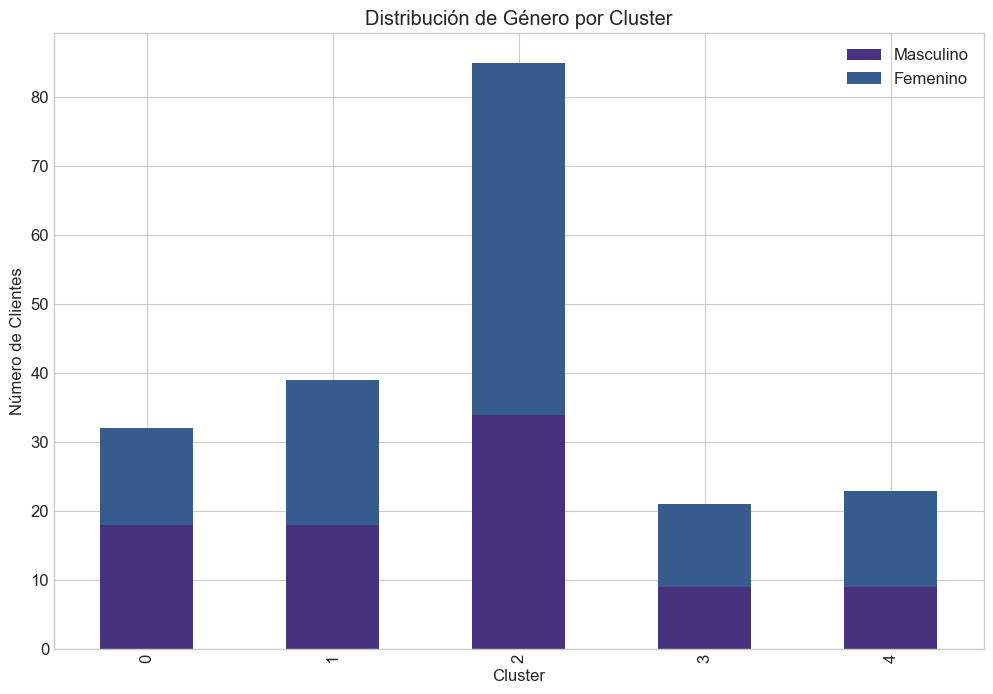

In [158]:
plt.figure(figsize=(8, 6))
gender_counts = df_processed.groupby(['Cluster', 'Gender']).size().unstack()
gender_counts.plot(kind='bar', stacked=True)
plt.title('Distribución de Género por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Clientes')
plt.legend(['Masculino', 'Femenino'])
plt.show()

In [74]:
cluster_profiles = df_processed.groupby('Cluster').mean()
print("Perfiles de cada cluster:")
display(cluster_profiles)

Perfiles de cada cluster:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,166.250000,0.437500,41.000000,89.406250,15.593750
1,162.000000,0.538462,32.692308,86.538462,82.128205
2,87.894118,0.600000,42.482353,55.811765,49.129412
3,22.000000,0.571429,25.333333,25.095238,80.047619
4,23.000000,0.608696,45.217391,26.304348,20.913043


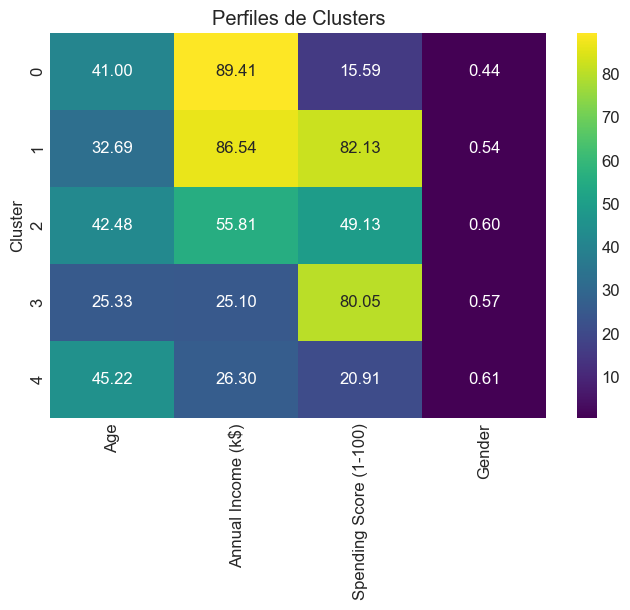

In [148]:
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_profiles[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], 
            annot=True, cmap='viridis', fmt='.2f')
plt.title('Perfiles de Clusters')
plt.show()

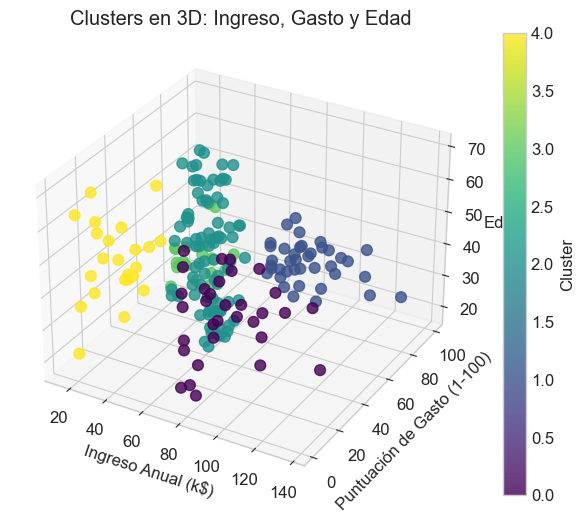

In [150]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_processed['Annual Income (k$)'],
    df_processed['Spending Score (1-100)'],
    df_processed['Age'],
    c=df_processed['Cluster'],
    s=60,
    alpha=0.8,
    cmap='viridis'
)
ax.set_xlabel('Ingreso Anual (k$)')
ax.set_ylabel('Puntuación de Gasto (1-100)')
ax.set_zlabel('Edad')
plt.title('Clusters en 3D: Ingreso, Gasto y Edad')
plt.colorbar(scatter, label='Cluster')
plt.show()

El análisis de hierarchical clustering ha identificado 5 segmentos distintos de personas, cada uno con características y comportamientos de compra únicos:

Cluster 0 - 32 Personas (16.0%):
  - Edad media: 41.0 años (rango: 19-59)
  - Género: 18 hombres, 14 mujeres
  - Ingreso anual medio: $89.4k (rango: $71-$137k)
  - Puntuación media de gasto: 15.6/100 (rango: 1-39)

Cluster 1 - 39 Personas (19.5%):
  - Edad media: 32.7 años (rango: 27-40)
  - Género: 18 hombres, 21 mujeres
  - Ingreso anual medio: $86.5k (rango: $69-$137k)
  - Puntuación media de gasto: 82.1/100 (rango: 63-97)

Cluster 2 - 85 Personas (42.5%):
  - Edad media: 42.5 años (rango: 18-70)
  - Género: 34 hombres, 51 mujeres
  - Ingreso anual medio: $55.8k (rango: $39-$79k)
  - Puntuación media de gasto: 49.1/100 (rango: 29-65)

Cluster 3 - 21 Personas (10.5%):
  - Edad media: 25.3 años (rango: 18-35)
  - Género: 9 hombres, 12 mujeres
  - Ingreso anual medio: $25.1k (rango: $15-$38k)
  - Puntuación media de gasto: 80.0/100 (rango: 61-99)

Cluster 4 - 23 Personas (11.5%):
  - Edad media: 45.2 años (rango: 19-67)
  - Género: 9 hombres, 14 mujeres
  - Ingreso anual medio: $26.3k (rango: $15-$39k)
  - Puntuación media de gasto: 20.9/100 (rango: 3-40)

El Coeficiente de Silhouette:tuvo una puntuación de 0.5538, lo cual indica una buena cantidad de separación entre los gruposcon algunas superposiciones entre ellos.

El Índice de Calinski-Harabasz: tuvo una puntuación de 244.4103, lo cual indica que los cluster son definidos pero no se encontro una estructura sustancial en los datos.
